In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import requests
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from itertools import combinations
from collections import OrderedDict 

%matplotlib inline

/Users/scottlew/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## READ IN MLB STATS FOR 1876-2018 SEASONS 

## Note: No salary data is used for regression in this case.

In [2]:
# read data from csv file for 2001-2018 MLB seasons
#df = pd.read_csv('MLB_STATS_1900-2018_BP.csv')
df = pd.read_csv('MLB_STATS_1876-2018_BP.csv')
#df = pd.read_csv('MLB_KBO_STATS_1876-2018_BP.csv') # korean baseball stats 2008-2018

In [3]:
df.head()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SO_y,SO/W,SO9,SV,W,W-L%,WHIP,WP,cSho,tSho
0,ATH,21,26.0,6.30,60,2414,2387,378,646,79,...,22,0.54,0.4,2,14,0.237,1.498,33,1.0,1.0
1,BSN,17,24.7,6.73,70,2780,2722,471,723,96,...,77,0.74,1.1,7,39,0.557,1.323,46,3.0,3.0
2,CHC,11,25.9,9.45,66,2818,2748,624,926,131,...,51,1.76,0.8,4,52,0.788,1.075,3,8.0,9.0
3,CIN,13,24.5,3.66,65,2413,2372,238,555,51,...,60,1.76,0.9,0,9,0.138,1.496,28,0.0,0.0
4,HAR,12,26.3,6.22,69,2703,2664,429,711,96,...,114,4.22,1.6,0,47,0.691,0.957,15,11.0,11.0


In [4]:
df.shape

(2815, 65)

In [5]:
df.tail()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SO_y,SO/W,SO9,SV,W,W-L%,WHIP,WP,cSho,tSho
2810,STL,49,28.0,4.69,162,6200,5498,759,1369,248,...,1337,2.25,8.3,43,88,0.543,1.338,63,1.0,8.0
2811,TBR,54,27.1,4.42,162,6195,5475,716,1415,274,...,1421,2.84,8.8,52,90,0.556,1.199,55,0.0,14.0
2812,TEX,50,27.4,4.55,162,6163,5453,737,1308,266,...,1121,2.28,7.1,42,67,0.414,1.403,57,0.0,5.0
2813,TOR,63,28.9,4.38,162,6076,5477,709,1336,320,...,1298,2.36,8.1,39,73,0.451,1.414,71,0.0,3.0
2814,WSN,53,27.6,4.76,162,6288,5517,771,1402,284,...,1417,2.91,8.8,40,82,0.506,1.250,42,1.0,7.0


In [6]:
df.dtypes

Tm         object
#Bat        int64
BatAge    float64
R/G       float64
G_x         int64
PA          int64
AB          int64
R_x         int64
H_x         int64
2B          int64
3B          int64
HR_x        int64
RBI       float64
SB        float64
CS        float64
BB_x        int64
SO_x        int64
BA        float64
OBP       float64
SLG       float64
OPS       float64
OPS+        int64
TB          int64
GDP       float64
HBP_x     float64
SH        float64
SF        float64
IBB_x     float64
LOB_x     float64
Year        int64
           ...   
CG          int64
ER          int64
ERA       float64
ERA+        int64
FIP       float64
G_y         int64
GF          int64
GS          int64
H_y         int64
H9        float64
HBP_y     float64
HR_y        int64
HR9       float64
IBB_y     float64
IP        float64
L           int64
LOB_y     float64
PAge      float64
R_y         int64
RA/G      float64
SO_y        int64
SO/W      float64
SO9       float64
SV          int64
W         

In [7]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

In [8]:
df.Year.value_counts()

1884    33
2017    30
2015    30
1998    30
2002    30
2004    30
2006    30
2008    30
2010    30
2012    30
2014    30
2016    30
2018    30
2005    30
2013    30
1999    30
2001    30
2003    30
2007    30
2009    30
2011    30
1993    28
1997    28
1996    28
1994    28
1995    28
1992    26
1990    26
1988    26
1986    26
        ..
1941    16
1905    16
1911    16
1901    16
1883    16
1957    16
1955    16
1953    16
1951    16
1947    16
1949    16
1885    16
1887    16
1889    16
1882    14
1892    12
1897    12
1895    12
1893    12
1894    12
1896    12
1898    12
1899    12
1881     8
1900     8
1879     8
1880     8
1876     8
1877     6
1878     6
Name: Year, Length: 142, dtype: int64

In [9]:
correlation = df.corr()

In [10]:
W_corr = correlation.W
W_corr

#Bat      0.178940
BatAge    0.352487
R/G       0.224332
G_x       0.582830
PA        0.629993
AB        0.599076
R_x       0.626056
H_x       0.649828
2B        0.509120
3B        0.014362
HR_x      0.447111
RBI       0.648062
SB       -0.008447
CS       -0.016638
BB_x      0.586737
SO_x      0.304754
BA        0.353061
OBP       0.533598
SLG       0.521056
OPS       0.564913
OPS+      0.549647
TB        0.649951
GDP       0.077197
HBP_x     0.127109
SH       -0.018893
SF        0.354130
IBB_x     0.354443
LOB_x     0.359822
Year      0.352521
#P        0.186490
            ...   
CG       -0.175771
ER        0.081558
ERA      -0.242158
ERA+      0.563912
FIP      -0.025223
G_y       0.582832
GF        0.356504
GS        0.582657
H_y       0.240439
H9       -0.487337
HBP_y    -0.092135
HR_y      0.256221
HR9       0.207969
IBB_y    -0.050684
IP        0.612138
L        -0.332367
LOB_y     0.042761
PAge      0.390851
R_y      -0.162247
RA/G     -0.607445
SO_y      0.441019
SO/W      0.

In [11]:
#df.SV.isna().sum()
df.isnull().sum()

Tm           0
#Bat         0
BatAge       0
R/G          0
G_x          0
PA           0
AB           0
R_x          0
H_x          0
2B           0
3B           0
HR_x         0
RBI         15
SB         123
CS         717
BB_x         0
SO_x         0
BA           0
OBP          0
SLG          0
OPS          0
OPS+         0
TB           0
GDP        909
HBP_x      110
SH         253
SF        1197
IBB_x      989
LOB_x      445
Year         0
          ... 
CG           0
ER           0
ERA          0
ERA+         0
FIP          0
G_y          0
GF           0
GS           0
H_y          0
H9           0
HBP_y      110
HR_y         0
HR9          0
IBB_y      989
IP           0
L            0
LOB_y      445
PAge         0
R_y          0
RA/G         0
SO_y         0
SO/W         0
SO9          0
SV           0
W            0
W-L%         0
WHIP         0
WP           0
cSho         8
tSho         8
Length: 65, dtype: int64

In [12]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

In [13]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

In [14]:
# No need to drop rows win Nan values if you choose your predictors carefully!
#df = df.dropna()
df.shape

(2815, 65)

In [15]:
df.W.describe()

count    2815.000000
mean       75.858970
std        16.007805
min         2.000000
25%        67.000000
50%        77.000000
75%        87.000000
max       116.000000
Name: W, dtype: float64

## Linear Regression with scikit learn model. Predictors chosen from R model

In [16]:
# Select regressor predictors for response variable wins
predictors = ['#Bat','BatAge','G_x','PA','AB', 'R_x','H_x','2B','HR_x',\
 'BB_x','SO_x','OPS+','TB','#P','BB_y','BF','BK','CG','ER',\
 'G_y','GF','H_y','HR_y', 'IP','PAge','R_y','SO_y','SV','WP']
print(len(predictors))

29


In [17]:
df_1876_2018 = df[predictors]

In [18]:
df_1876_2018.head(3)

,#Bat,BatAge,G_x,PA,AB,R_x,H_x,2B,HR_x,BB_x,...,G_y,GF,H_y,HR_y,IP,PAge,R_y,SO_y,SV,WP
0,21,26.0,60,2414,2387,378,646,79,7,27,...,60,7,783,2,550.0,26.4,534,22,2,33
1,17,24.7,70,2780,2722,471,723,96,9,58,...,70,21,732,7,632.0,21.9,450,77,7,46
2,11,25.9,66,2818,2748,624,926,131,8,70,...,66,8,608,6,592.1,25.1,257,51,4,3


In [19]:
df_1876_2018.shape

(2815, 29)

In [20]:
# Save result df as as csv file for future use!
#df_1876_2018.to_csv('MLB_STATS_29.csv', index = False)

In [21]:
# create training and testing data

y = df.W
#y = y.dropna()
X = df[predictors]
#X = X.dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2252, 29) (2252,)
(563, 29) (563,)


In [22]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [23]:
print("The Training Score For Model 1:")
print(lm.score(X_train,y_train))
print()
print("The Test Score For Model 1:")
print(lm.score(X_test,y_test))
print()
print(model.coef_)

The Training Score For Model 1:
0.94970472573

The Test Score For Model 1:
0.943542127477

[-0.08627889  0.05280529 -0.55328398 -0.02038939 -0.00937173  0.08057455
  0.02278549  0.01009626  0.00830482  0.02056833 -0.00271996 -0.01977441
  0.0012126   0.12127803 -0.01037104  0.00652245 -0.0596555   0.23916841
  0.0094773   0.45075987  0.12476111 -0.01005002 -0.00901291  0.11276188
  0.08412537 -0.07655668  0.0023611   0.29978187  0.00477725]


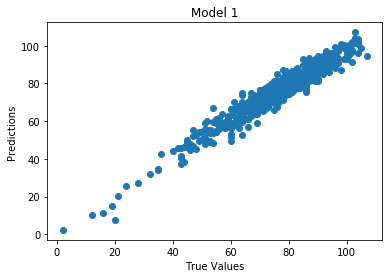

In [24]:
plt.scatter(y_test, predictions)
plt.title("Model 1")
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [25]:
pred_tr = lm.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr))
print('For Linear Regression Model 1 With 29 Regressor-Predictors:')
print("Root Mean Squared Error Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error Test: {}".format(rmse_test))
print()

For Linear Regression Model 1 With 29 Regressor-Predictors:
Root Mean Squared Error Train: 3.5773389114357785

Root Mean Squared Error Test: 3.853454706405568



In [26]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predictions)
mae

3.0446380556870354

## LM Regression Model with Fewer Predictors (13)

In [27]:
predictors2 = ['#Bat','PA','AB', 'R_x','H_x',\
               'BB_x','#P','BB_y','BF','H_y','IP','R_y','SV']
print(len(predictors2))

13


In [28]:
# create training and testing data
y = df.W
X = df[predictors2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2252, 13) (2252,)
(563, 13) (563,)


In [29]:
# fit a model
lm_2 = LinearRegression()
model_2 = lm_2.fit(X_train, y_train)
predictions = lm_2.predict(X_test)

In [30]:
print("The Trainng Score For Model 2 with 13 predictors:")
print(lm_2.score(X_train,y_train))
print()
print("The Test Score For Model 2 with 13 predictors:")
print(lm_2.score(X_test,y_test))
print()
print(model_2.coef_)

The Trainng Score For Model 2 with 13 predictors:
0.9413833792

The Test Score For Model 2 with 13 predictors:
0.93044303432

[-0.1267208  -0.01909384 -0.01002808  0.09104981  0.02248489  0.01767327
 -0.00741291 -0.01112834  0.00371703 -0.01073337  0.13318495 -0.06872491
  0.10769181]


In [31]:
pred_tr = lm_2.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr))
print('For Linear Regression Model With 13 Regressor-Predictors:')
print("Root Mean Squared Error Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error Test: {}".format(rmse_test))
print()

For Linear Regression Model With 13 Regressor-Predictors:
Root Mean Squared Error Train: 3.8619521198657316

Root Mean Squared Error Test: 4.277187790114103



In [32]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predictions)
mae

3.3625192356896161

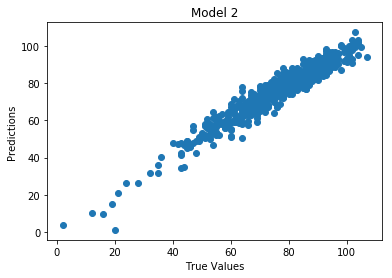

In [33]:
plt.scatter(y_test, predictions)
plt.title("Model 2")
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Another LM OLS Model

In [34]:
predictors3 = ['#Bat','PA','AB', 'R_x','H_x',\
               'BB_x','#P','BB_y','BF','H_y','IP','R_y','SV','SO_x','BK','ER','OPS']
print(len(predictors3))

17


In [35]:
# create training and testing data
y = df.W
X = df[predictors3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2252, 17) (2252,)
(563, 17) (563,)


In [36]:
# fit a model
lm_3 = LinearRegression()
model_3 = lm_3.fit(X_train, y_train)
predictions = lm_3.predict(X_test)

In [37]:
print("The Trainng Score For Model 3:")
print(lm_3.score(X_train,y_train))
print()
print("The Test Score For Model 3:")
print(lm_3.score(X_test,y_test))
print()
print(model_3.coef_)

The Trainng Score For Model 3:
0.944020472666

The Test Score For Model 3:
0.934368990076

[-0.12679993 -0.01988188 -0.00726901  0.09071106  0.01757722  0.01817069
  0.10833692 -0.01031748  0.00416856 -0.00954692  0.13090292 -0.06289786
  0.17801637 -0.0049182  -0.10089775 -0.00955171  1.45529389]


In [38]:
pred_tr = lm_3.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr))
print('For Linear Regression Model With '+ str(len(predictors3)) +' Regressor-Predictors:')
print("Root Mean Squared Error Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error Test: {}".format(rmse_test))
print()

For Linear Regression Model With 17 Regressor-Predictors:
Root Mean Squared Error Train: 3.774080068613716

Root Mean Squared Error Test: 4.154727531255445



In [39]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predictions)
mae

3.2451284162792104

## Simple Model Using Runs Scored & Runs Allowed

In [40]:
predictors4 = ['R_x','R_y']

In [41]:
# create training and testing data
y = df.W
X = df[predictors4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2252, 2) (2252,)
(563, 2) (563,)


In [42]:
# fit a model
lm_4 = LinearRegression()
model_4 = lm_4.fit(X_train, y_train)
predictions = lm_4.predict(X_test)

In [43]:
print("The Trainng Score For Model 3:")
print(lm_4.score(X_train,y_train))
print()
print("The Test Score For Model 3:")
print(lm_4.score(X_test,y_test))
print()
print(model_4.coef_)

The Trainng Score For Model 3:
0.663823387519

The Test Score For Model 3:
0.70847628016

[ 0.11779454 -0.07622599]


In [44]:
pred_tr = lm_4.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr))
print('For Linear Regression Model With '+ str(len(predictors3)) +' Regressor-Predictors:')
print("Root Mean Squared Error Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error Test: {}".format(rmse_test))
print()

For Linear Regression Model With 17 Regressor-Predictors:
Root Mean Squared Error Train: 9.248690458163589

Root Mean Squared Error Test: 8.756387104347779



In [45]:
df['RunsRatio'] = df['R_x']/df['R_y']
df['RunsPercent'] = df['R_x']/(df['R_y'] + df['R_x'])
df['Pythag'] = df['R_x']**2/(df['R_y']**2 + df['R_x']**2)

In [46]:
df.head(3)

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SV,W,W-L%,WHIP,WP,cSho,tSho,RunsRatio,RunsPercent,Pythag
0,ATH,21,26.0,6.30,60,2414,2387,378,646,79,...,2,14,0.237,1.498,33,1.0,1.0,0.707865,0.414474,0.333810
1,BSN,17,24.7,6.73,70,2780,2722,471,723,96,...,7,39,0.557,1.323,46,3.0,3.0,1.046667,0.511401,0.522789
2,CHC,11,25.9,9.45,66,2818,2748,624,926,131,...,4,52,0.788,1.075,3,8.0,9.0,2.428016,0.708286,0.854973


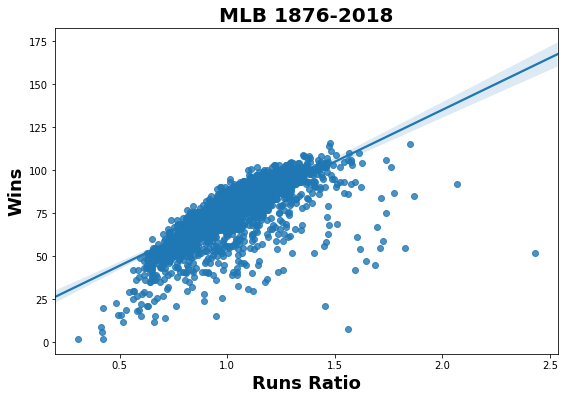

In [47]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="RunsRatio", y="W", data = df)
plt.xlabel('Runs Ratio', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)

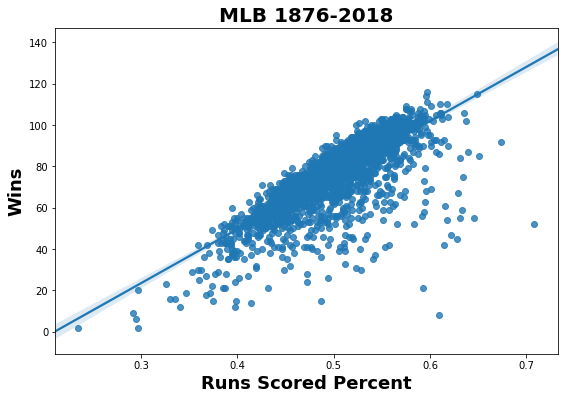

In [48]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="RunsPercent", y="W", data = df)
plt.xlabel('Runs Scored Percent', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)

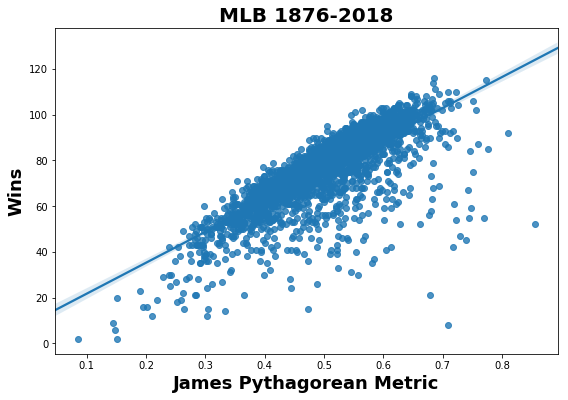

In [49]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="Pythag", y="W", data = df)
plt.xlabel('James Pythagorean Metric', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)

In [50]:
# create training and testing data
y = df.W.values.reshape(-1,1)
X = df['RunsRatio'].values.reshape(-1,1)
#X = X.reshape(1, -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2252, 1) (2252, 1)
(563, 1) (563, 1)


In [51]:
# fit a model
from sklearn import linear_model
lm_5 = linear_model.LinearRegression()
model_5 = lm_5.fit(X_train, y_train)
predictions = lm_5.predict(X_test)

In [52]:
print("The Trainng Score For Model 5:")
print(lm_5.score(X_train,y_train))
print()
print("The Test Score For Model 5:")
print(lm_5.score(X_test,y_test))
print()
print(model_5.coef_)

The Trainng Score For Model 5:
0.508318736691

The Test Score For Model 5:
0.634122334641

[[ 59.02989292]]


In [53]:
pred_tr = lm_5.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr))
print('For Linear Regression Model With Runs Ratio:')
print("Root Mean Squared Error Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error Test: {}".format(rmse_test))
print()

For Linear Regression Model With Runs Ratio:
Root Mean Squared Error Train: 11.185060189118287

Root Mean Squared Error Test: 9.809705146765744



In [54]:
# create training and testing data
y = df.W.values.reshape(-1,1)
X = df['Pythag'].values.reshape(-1,1)
#X = X.reshape(1, -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2252, 1) (2252, 1)
(563, 1) (563, 1)


In [55]:
# fit a model
from sklearn import linear_model
lm_6 = linear_model.LinearRegression()
model_6 = lm_6.fit(X_train, y_train)
predictions = lm_6.predict(X_test)

In [56]:
print("The Trainng Score For Model 6:")
print(lm_6.score(X_train,y_train))
print()
print("The Test Score For Model 6:")
print(lm_6.score(X_test,y_test))
print()
print(model_6.coef_)

The Trainng Score For Model 6:
0.578953294097

The Test Score For Model 6:
0.69485483464

[[ 133.82468541]]


In [57]:
pred_tr = lm_6.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr))
print('For Linear Regression Model With Runs Ratio:')
print("Root Mean Squared Error Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error Test: {}".format(rmse_test))
print()

For Linear Regression Model With Runs Ratio:
Root Mean Squared Error Train: 10.350507230055943

Root Mean Squared Error Test: 8.958622797004995



In [58]:
model_6 = sm.OLS(y_train, X_train)
results = model_6.fit()
print('statsmodel 6 Pythagorean Metric')
print(results.summary())

statsmodel 6 Pythagorean Metric
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.212e+05
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:53:24   Log-Likelihood:                -8483.5
No. Observations:                2252   AIC:                         1.697e+04
Df Residuals:                    2251   BIC:                         1.697e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           150.669

In [59]:
predictors = ['ERA','SV','Pythag']
# create training and testing data
y = df.W
X = df[predictors]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2252, 3) (2252,)
(563, 3) (563,)


In [60]:
# fit a model
from sklearn import linear_model
lm_7 = linear_model.LinearRegression()
model_7 = lm_7.fit(X_train, y_train)
predictions = lm_7.predict(X_test)

print("The Trainng Score For Model 5:")
print(lm_7.score(X_train,y_train))
print()
print("The Test Score For Model 5:")
print(lm_7.score(X_test,y_test))
print()
print(model_7.coef_)

The Trainng Score For Model 5:
0.72520858621

The Test Score For Model 5:
0.793673054965

[   0.91822149    0.36641068  127.67810298]


In [61]:
pred_tr = lm_7.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr))
print('For Linear Regression Model 7:')
print("Root Mean Squared Error Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error Test: {}".format(rmse_test))
print()

For Linear Regression Model 7:
Root Mean Squared Error Train: 8.361767260602281

Root Mean Squared Error Test: 7.366581163555272



## Another Model with 28 Predictors including Pythag

In [62]:
# Select regressor predictors for response variable wins
predictors = ['#Bat','BatAge','G_x','PA','AB','H_x','2B','HR_x',\
 'BB_x','SO_x','OPS+','TB','#P','BB_y','BF','BK','CG','ER',\
 'G_y','GF','H_y','HR_y', 'IP','PAge','SO_y','SV','WP','Pythag']

print(len(predictors))

28


In [63]:
# create training and testing data
y = df.W
X = df[predictors]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2252, 28) (2252,)
(563, 28) (563,)


In [64]:
# fit a model
from sklearn import linear_model
lm_8 = linear_model.LinearRegression()
model_8 = lm_8.fit(X_train, y_train)
predictions = lm_8.predict(X_test)

print("The Trainng Score For Model 8:")
print(lm_8.score(X_train,y_train))
print()
print("The Test Score For Model 8:")
print(lm_8.score(X_test,y_test))
print()
print(model_8.coef_)

The Trainng Score For Model 8:
0.945054139693

The Test Score For Model 8:
0.940851775944

[ -1.02857673e-01   2.97817825e-02  -3.40493701e-02  -2.19306519e-02
  -9.81920190e-03   3.25969712e-02   5.49994610e-03   7.77243482e-03
   3.36109482e-02  -1.79710668e-03  -8.80778346e-02   1.07665533e-02
   1.54606594e-01  -1.40936960e-02   5.63593808e-03  -5.68858972e-02
  -1.18095563e-01  -5.69418948e-03   2.66982616e-01  -2.37800154e-01
  -1.57984872e-02  -1.70919473e-02   1.14133602e-01   1.03649313e-01
   1.69494974e-03   3.12860504e-01   1.29865708e-02   8.33994262e+01]


In [65]:
pred_tr = lm_8.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr))
print('For Linear Regression Model 8:')
print("Root Mean Squared Error Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error Test: {}".format(rmse_test))
print()

For Linear Regression Model 8:
Root Mean Squared Error Train: 3.739073350495284

Root Mean Squared Error Test: 3.9441993657028207



In [66]:
# Save result df as as csv file for future use!
df.to_csv('MLB_STATS_Pythag.csv', index = False)

In [67]:
df2 = pd.read_csv('MLB_STATS_Pythag.csv')

In [68]:
df2.shape

(2815, 68)

In [69]:
df2.head(3)

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SV,W,W-L%,WHIP,WP,cSho,tSho,RunsRatio,RunsPercent,Pythag
0,ATH,21,26.0,6.30,60,2414,2387,378,646,79,...,2,14,0.237,1.498,33,1.0,1.0,0.707865,0.414474,0.333810
1,BSN,17,24.7,6.73,70,2780,2722,471,723,96,...,7,39,0.557,1.323,46,3.0,3.0,1.046667,0.511401,0.522789
2,CHC,11,25.9,9.45,66,2818,2748,624,926,131,...,4,52,0.788,1.075,3,8.0,9.0,2.428016,0.708286,0.854973


In [70]:
df2.tail(3)

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SV,W,W-L%,WHIP,WP,cSho,tSho,RunsRatio,RunsPercent,Pythag
2812,TEX,50,27.4,4.55,162,6163,5453,737,1308,266,...,42,67,0.414,1.403,57,0.0,5.0,0.869104,0.464984,0.430310
2813,TOR,63,28.9,4.38,162,6076,5477,709,1336,320,...,39,73,0.451,1.414,71,0.0,3.0,0.852163,0.460091,0.420687
2814,WSN,53,27.6,4.76,162,6288,5517,771,1402,284,...,40,82,0.506,1.250,42,1.0,7.0,1.130499,0.530626,0.561024


## Test of Model 1 Using Korean Baseball Stats from 2008 to 2018

In [71]:
kb = pd.read_csv('KB_STATS_2008-2018_BP.csv') 
kb.head()

,Tm,BatAge,R/G_x,G_x,PA,AB,R_x,H_x,2B,3B,...,HBP_y,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
0,LG Twins,29.3,NaN,NaN,4742,4184,468,1070,164,23,...,72,3,46,4976,1.551,10.1,0.7,3.9,5.1,1.31
1,Doosan Bears,26.7,NaN,NaN,4974,4344,647,1198,166,37,...,69,5,45,4857,1.317,8.8,0.6,3.0,6.2,2.06
2,Kia Tigers,28.3,NaN,NaN,4831,4210,503,1095,188,28,...,77,5,52,4850,1.380,8.6,0.5,3.8,5.9,1.55
3,Lotte Giants,27.6,NaN,NaN,4890,4256,624,1200,199,22,...,47,2,42,4769,1.379,9.1,0.6,3.3,5.4,1.64
4,SK Wyverns,26.9,NaN,NaN,5003,4332,632,1222,215,23,...,55,2,35,4855,1.304,8.2,0.6,3.5,6.3,1.79


In [72]:
# filter out rows with very low GF values using a boolean mask
mask = (kb['GF'] >= 100 )
kb_fil = kb[mask]

In [73]:
# Based on the above correlation matrix, SV is moderately negatively correlated with ERA
# SLG, OBP & BA are all highly correlated with each other